In [1]:
pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/train.csv')

In [4]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Data Preprocessing

In [6]:
data.shape

(20800, 5)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### Text Preprocessing

In [10]:
import re
import string

Convert uppercase to lowercase

In [12]:
data["text"] = data["text"].fillna("").apply(
    lambda x: " ".join(x.lower() for x in str(x).split())
)


In [13]:
data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide: we didn’t even see comey’s let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"why the truth might get you fired october 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentenced to s...,1


In [14]:
data["title"] = data["title"].fillna("").apply(
    lambda x: " ".join(x.lower() for x in str(x).split())
)

In [15]:
data["title"].head(5)

0    house dem aide: we didn’t even see comey’s let...
1    flynn: hillary clinton, big woman on campus - ...
2                    why the truth might get you fired
3    15 civilians killed in single us airstrike hav...
4    iranian woman jailed for fictional unpublished...
Name: title, dtype: object

Remove links

In [17]:
data["text"] = data["text"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [18]:
data["title"] = data["title"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

data["text"].tail(5)

In [20]:
data["text"].tail(5)

20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799    david swanson is an author, activist, journali...
Name: text, dtype: object

In [21]:
data["text"] = data["text"].apply(
    lambda x: re.sub(r'\d+', '', x)
)
data["title"] = data["title"].apply(
    lambda x: re.sub(r'\d+', '', x)
)

Remove Stopwords

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
import nltk

In [25]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [27]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
data["text"] = data["text"].apply(
    lambda x: " ".join(word for word in x.split() if word not in sw)
)
data["title"] = data["title"].apply(
    lambda x: " ".join(word for word in x.split() if word not in sw)
)

In [29]:
data["text"].tail(5)

20795    rapper t. i. unloaded black celebrities met do...
20796    green bay packers lost washington redskins wee...
20797    macy’s today grew union several great names am...
20798    nato, russia hold parallel exercises balkans /...
20799    david swanson author, activist, journalist, ra...
Name: text, dtype: object

Stemming

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
data["title"] = data["title"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [33]:
data["text"].tail(5)

20795    rapper t. i. unload black celebr met donald tr...
20796    green bay packer lost washington redskin week ...
20797    macy’ today grew union sever great name americ...
20798    nato, russia hold parallel exercis balkan // p...
20799    david swanson author, activist, journalist, ra...
Name: text, dtype: object

## Building Vocabulary

In [35]:
from collections import Counter
vocab = Counter()

In [36]:
vocab

Counter()

In [37]:
for sentence in data['text']:
    vocab.update(sentence.split())

In [38]:
len(vocab)

380600

In [39]:
data.shape

(20800, 5)

In [40]:
tokens = [key for key in vocab if vocab[key] > 60]

In [41]:
len(tokens)

13074

In [42]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide Dataset

In [44]:
data

,id,title,author,text,label
0,0,hous dem aide: didn’t even see comey’ letter j...,Darrell Lucus,hous dem aide: didn’t even see comey’ letter j...,1
1,1,"flynn: hillari clinton, big woman campu - brei...",Daniel J. Flynn,ever get feel life circl roundabout rather hea...,0
2,2,truth might get fire,Consortiumnews.com,"truth might get fire octob , tension intellig ...",1
3,3,civilian kill singl us airstrik identifi,Jessica Purkiss,video civilian kill singl us airstrik identifi...,1
4,4,iranian woman jail fiction unpublish stori wom...,Howard Portnoy,print iranian woman sentenc six year prison ir...,1
...,...,...,...,...,...
20795,20795,rapper t.i.: trump ’poster child white supremacy’,Jerome Hudson,rapper t. i. unload black celebr met donald tr...,0
20796,20796,"n.f.l. playoffs: schedule, matchup odd - new y...",Benjamin Hoffman,green bay packer lost washington redskin week ...,0
20797,20797,macy’ said receiv takeov approach hudson’ bay ...,Michael J. de la Merced and Rachel Abrams,macy’ today grew union sever great name americ...,0
20798,20798,"nato, russia hold parallel exercis balkan",Alex Ansary,"nato, russia hold parallel exercis balkan // p...",1


In [45]:
X = data['text']
Y = data['label']

In [46]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [48]:
X_train.shape

(16640,)

In [49]:
X_test.shape

(4160,)

## Vectorization

In [51]:
Y_test.shape

(4160,)

In [95]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = CountVectorizer()
vectorized_x_train = vectorizer.fit_transform(X_train)


tfidf = TfidfVectorizer()
vectorized_x_train = tfidf.fit_transform(X_train)


In [99]:
vectorized_x_train = tfidf.fit_transform(X_train)
vectorized_x_test = tfidf.transform(X_test)


In [105]:
vectorized_x_train

<16640x151346 sparse matrix of type '<class 'numpy.float64'>'
	with 4502011 stored elements in Compressed Sparse Row format>

In [107]:
Y_test

5225     0
13480    0
18909    0
18945    1
17647    0
        ..
695      0
10366    1
18448    1
5973     0
19430    0
Name: label, Length: 4160, dtype: int64

In [109]:
Y_train.value_counts()

label
1    8339
0    8301
Name: count, dtype: int64

## Already Balanced Dataset

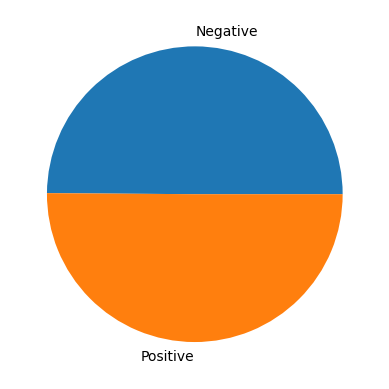

In [116]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

In [118]:
Y_train

7063     1
660      0
4821     0
13561    1
11057    1
        ..
6676     1
1590     1
16953    1
9640     1
18186    1
Name: label, Length: 16640, dtype: int64

In [122]:
vectorized_x_train

<16640x151346 sparse matrix of type '<class 'numpy.float64'>'
	with 4502011 stored elements in Compressed Sparse Row format>

In [124]:
vectorized_x_test

<4160x151346 sparse matrix of type '<class 'numpy.float64'>'
	with 1093940 stored elements in Compressed Sparse Row format>

In [126]:
Y_test

5225     0
13480    0
18909    0
18945    1
17647    0
        ..
695      0
10366    1
18448    1
5973     0
19430    0
Name: label, Length: 4160, dtype: int64

## Model Training and Evaluation

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB       
from sklearn.tree import DecisionTreeClassifier     
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [139]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    
    print(f"Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    
    print(f"Validation Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")


## Logistic Regression

In [165]:
lr = LogisticRegression()
lr.fit(vectorized_x_train, Y_train)

Y_train_pred = lr.predict(vectorized_x_train)

Y_test_pred = lr.predict(vectorized_x_test)

training_scores(Y_train, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 0.974
	Precision = 0.969
	Recall = 0.978
	F1-Score = 0.974
Validation Scores:
	Accuracy = 0.948
	Precision = 0.942
	Recall = 0.953
	F1-Score = 0.948


## Naive Bayes

In [167]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train, Y_train)

Y_train_pred = mnb.predict(vectorized_x_train)

Y_test_pred = mnb.predict(vectorized_x_test)

training_scores(Y_train, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 0.904
	Precision = 0.992
	Recall = 0.815
	F1-Score = 0.895
Validation Scores:
	Accuracy = 0.863
	Precision = 0.986
	Recall = 0.735
	F1-Score = 0.842


## DEsicion Tree

In [170]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train, Y_train)

Y_train_pred = dt.predict(vectorized_x_train)

Y_test_pred = dt.predict(vectorized_x_test)

training_scores(Y_train, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Validation Scores:
	Accuracy = 0.884
	Precision = 0.884
	Recall = 0.883
	F1-Score = 0.884


## Random Forest

In [173]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train, Y_train)

Y_train_pred = rf.predict(vectorized_x_train)

Y_test_pred = rf.predict(vectorized_x_test)

training_scores(Y_train, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Validation Scores:
	Accuracy = 0.913
	Precision = 0.939
	Recall = 0.883
	F1-Score = 0.91


## Support Vector Machine

In [176]:
svm = SVC()
svm.fit(vectorized_x_train, Y_train)

Y_train_pred = svm.predict(vectorized_x_train)

Y_test_pred = svm.predict(vectorized_x_test)

training_scores(Y_train, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Validation Scores:
	Accuracy = 0.96
	Precision = 0.957
	Recall = 0.962
	F1-Score = 0.96


In [178]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)